# My-Dog-Classification
## Author: Matthew Nicholson, Warwick
The purpose of this notebook is test how well neural networks can cope if they have a particularly limited dataset. What follows is a simple classification task implemented with the Pytorch package. I will try to train a network to recognise the difference between my dogs: Max and Cooper.

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import matplotlib.pyplot as plt

Firstly, I will import the dataset. My consists of some 500 images of both Max and Cooper that are (for now) stored locally on my laptop. This involves defining a custom Dataset class that inherits features of Pytorch's abstract Dataset class.

In [2]:
class DogDataset(Dataset):
    """Dataset for images of my dogs"""
    
    def __init__(self, imageDirectory, transform=None):
        
        self.imageDirectory = imageDirectory
        ##self.labels = pd.read_csv(csv)
        self.transform = transform
        
    def __len__(self):
        return len(os.listdir(self.imageDirectory))
    
    def __getitem__(self, idx):
        
        img_name = self.imageDirectory + str(idx) + ".jpg" 
        image = io.imread(img_name)
        if idx < 224:
            dog = 'Cooper'
        else:
            dog = 'Max'
        
        sample = {'image': image, 'dog': dog}
        return sample
        
        

In [3]:
myData = DogDataset('./data2/')

The neural network will expect the photos to be of fixed size and have a square aspect ratio, hence we will create a pair of transform classes to do this.

In [4]:
class Rescale(object):
    
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size
        
    def __call__(self, sample):
        image, dog = sample['image'], sample['dog']
        
        newHeight, newWidth = self.output_size
        newHeight, newWidth = int(newHeight), int(newWidth)
        
        image = transform.resize(image, (newHeight, newWidth))
        
        return {'image': image, 'dog': dog}
    


Let's have a look at some of these images after they've been resized:

In [31]:
scale = Rescale((512,512))

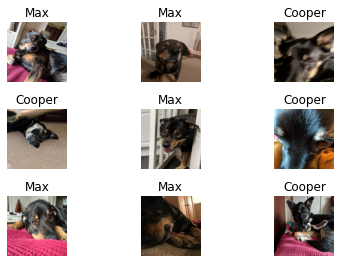

In [32]:
fig = plt.figure()
for i in range(1,10):
    ax = plt.subplot(3, 3, i)
    plt.tight_layout()
    ax.axis('off')
    
    n = np.random.randint(1,len(myData))
    sample = myData[n]
    resizedSample = scale(sample)
    ax.set_title(resizedSample['dog'])
    plt.imshow(resizedSample['image'])
    
    

We want to convert our images to Tensors, so they can be used within Pytorch. We create a callable class for this too.

In [40]:
class ToTensor(object):
    
    def __call__(self, sample):
        image = sample['image']
        
        image = image.transpose((2, 0, 1))
        
        return {'image': torch.from_numpy(image), 'dog': sample['dog']}

In [41]:
T = ToTensor()
TP = T(resizedSample)

In [44]:
type(TP['image'])

torch.Tensor